<a href="https://colab.research.google.com/github/nish-ace/Document_Classification/blob/main/Document_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* https://poloclub.github.io/cnn-explainer/
* https://neptune.ai/blog/image-classification-tips-and-tricks-from-13-kaggle-competitions#:~:text=Image%20pre%2Dprocessing%20%2B%20EDA&text=The%20first%20step%20is%20Exploratory,the%20results%20of%20this%20analysis.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### <u><b>Importing Necessary Libraries

In [ ]:
import numpy as np                                         # for array and vector operations
import matplotlib.pyplot as plt                            # to plot various graphs and images 
import cv2                                                 # for loading and reading images
from tqdm import tqdm                                      # for creating progress meters
import shutil                                              # to copy the content of source file to destination file
import pandas as pd                                        # for data analysis and associated manipulation of tabular data in Dataframes
import os                                                  # to interact with the operating system
import seaborn as sns                                      # to visualize the trends and patterns in the data
import pickle                                              # to load and save trained model files
from sklearn.model_selection import train_test_split       # for splitting the dataset into training and testing sets
import tensorflow as tf

### <u><b>Data Preparation

In [ ]:
# Reading the labels csv file into a Dataframe

df = pd.read_csv('train_labels.csv')  

In [ ]:
# Implementing the bifurcation of the dataset, containing the labels, into training and testing set

X_train, X_test, y_train, y_test = train_test_split(df['id'], df['label'], test_size=.3, random_state=18)

#### Train Data

In [ ]:
# Creating the training dataset

df_train = pd.DataFrame(y_train, index=X_train, columns=['label'])
df_train

,label
id,
432,9
9369,7
15117,9
7823,11
188,5
...,...
1726,5
2885,15
9336,1


In [ ]:
# Making directories for the 16 distinct classses

parent_dir = r"E:\Document Classification\train"
for _ in range(0,16):
    dir = str(_)
    path = os.path.join(parent_dir, dir)  # Path of the new directory
    os.makedirs(path)                     # Creating the new directory

In [ ]:
# Using the shutil module to copy the file from the __________ to their respective directories

for i in X_train:
    cat = str(df_train.loc[i][0])
    shutil.copy(rf'E:\Document Classification\train\{i}.tif', rf'E:\Document Classification\train\{cat}')

#### Test Data

In [ ]:
# Creating the validation dataset

df_test = pd.DataFrame(y_test, index=X_test, columns=['label'])
df_test

,label
id,
10310,4
10372,11
11739,12
5910,11
2102,7
...,...
1151,14
9982,10
34,7


In [ ]:
# Making directories for the 16 distinct classses

parent_dir = r"E:\Document Classification\test"
for _ in range(0,16):
    dir = str(_)
    path = os.path.join(parent_dir, dir)  #path of the new directory
    os.makedirs(path)                     #Creating the new directory

In [ ]:
# Using the shutil module to copy the file from the __________ to their respective directories

for i in X_test:
    cat = str(df_test.loc[i][0])
    shutil.copy(rf'E:\Document Classification\train\{i}.tif', rf'E:\Document Classification\test\{cat}')

### <u><b>Data Loading

In [ ]:
def load_data():
    
    """
        Load the data:
            - 11,202 images to train the network.
            - 4,800 images to evaluate how accurately the network learned to classify images.
    """
    
    datasets = [r"/content/drive/MyDrive/Document_Classification/Datathon@IndoML/train", r"/content/drive/MyDrive/Document_Classification/Datathon@IndoML/test"]
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = folder
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path, cv2.IMREAD_ANYDEPTH|cv2.IMREAD_UNCHANGED)
                image = cv2.resize(image, (200,400)) 
                
                # Append the image and its corresponding label to the output
                images.append((image).flatten())
                labels.append(label)
                
        images = np.array(images, dtype = 'float16')/255. #Normalize the images
        labels = np.array(labels, dtype = 'int16')   
        
        output.append((images, labels))

    return output

In [ ]:
# Implementing the "load_data" function 

(train_images, train_labels), (test_images, test_labels) = load_data()

Loading /content/drive/MyDrive/Document_Classification/Datathon@IndoML/train


100%|██████████| 678/678 [00:04<00:00, 150.76it/s]


Loading /content/drive/MyDrive/Document_Classification/Datathon@IndoML/test


100%|██████████| 331/331 [00:02<00:00, 153.56it/s]


In [ ]:
pd.DataFrame(train_images).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11232 entries, 0 to 11231
Columns: 60000 entries, 0 to 59999
dtypes: float16(60000)
memory usage: 1.3 GB


### <u><b>Exploring the dataset

Number of training and testing examples

In [ ]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))

Number of training examples: 11202
Number of testing examples: 4800


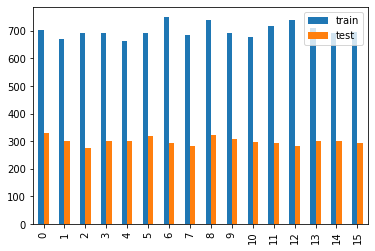

In [ ]:
_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)

pd.DataFrame({'train': train_counts,
              'test': test_counts}, 
             index=[i for i in range(0,16)]).plot.bar()

plt.show()

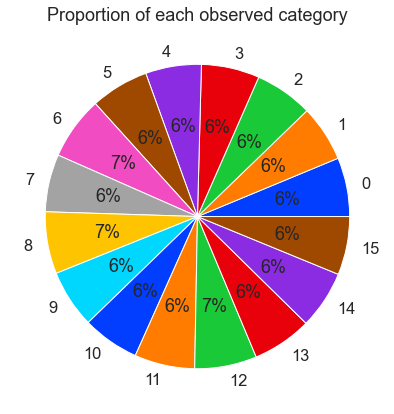

In [ ]:
data = train_counts
keys = [i for i in range(0,16)]
palette_color = sns.color_palette('bright')
plt.subplots(figsize = (7,7))
sns.set_theme(font_scale= 1.5, palette = 'dark')
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.title('Proportion of each observed category')
plt.show()

Displaying random 25 images from the training examples

In [ ]:
def display_examples(class_names, images, labels):
    
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    count = 0
    sns.set_theme(font_scale= 1.5)
    fig.suptitle("Some examples of images of the dataset")
    for i in np.random.randint(11202, size = 25):
        # plt.subplots(figsize = (3,3))
        plt.subplot(5,5,count+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(np.reshape(train_images[i], (450,600)))
        plt.xlabel(f'Class: {class_names[labels[i]]}')
        count+=1
    plt.show()

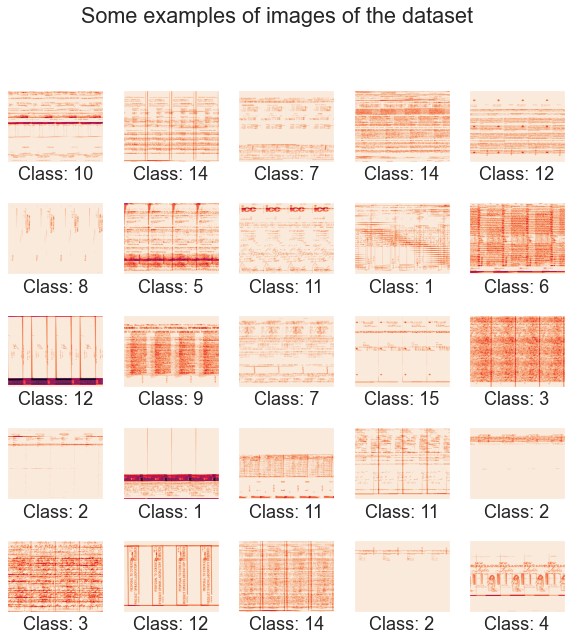

In [ ]:
display_examples([i for i in range(0,16)], train_images, train_labels)

### <u><b>Using Machine Learning Model Classifiers

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=5)
rf.fit(pd.DataFrame(train_images), train_labels)

RandomForestClassifier(n_estimators=5)

In [ ]:
with open('RandomForest.sav','wb') as f: 
    pickle.dump(rf, f)

In [ ]:
with open(r'E:\Document Classification\RandomForest.sav','rb') as p:
    model_rf = pickle.load(p) 

In [ ]:
model_rf.score(test_images, test_labels)

0.2808333333333333

#### XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
xgb_c = xgb.XGBClassifier(n_estimators = 5)
xgb_c.fit(train_images, train_labels)

XGBClassifier(n_estimators=5, objective='multi:softprob')

In [ ]:
with open('XGBoost.sav','wb') as f: 
    pickle.dump(xgb_c, f)

In [ ]:
with open(r'E:\Document Classification\XGBoost.sav','rb') as p:
    model_xgb = pickle.load(p) 

In [ ]:
model_xgb.score(test_images, test_labels)

0.29770833333333335

#### Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
multi_nb = MultinomialNB()
multi_nb.fit(train_images, train_labels)

MultinomialNB()

In [ ]:
with open('MultinomialNB.sav','wb') as f: 
    pickle.dump(multi_nb, f)

In [ ]:
with open(r'E:\Document Classification\MultinomialNB.sav','rb') as p:
    model_nb = pickle.load(p) 

In [ ]:
model_nb.score(test_images, test_labels)

0.300625

#### Softmax Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(solver='sag')
lr.fit(train_images, train_labels)

c:\Users\Nishchal Agarwal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(solver='sag')

In [ ]:
with open('LogisticRegression.sav','wb') as f: 
    pickle.dump(lr, f)

In [ ]:
with open(r'E:\Document Classification\LogisticRegression.sav','rb') as p:
    model_nb = pickle.load(p) 

In [ ]:
lr.score(test_images, test_labels)

0.3572916666666667

## **Implementing Artificial Neural Network :**

In [ ]:
ann = tf.keras.models.Sequential()                                    # Initializing ANN

ann.add(tf.keras.layers.Dense(units = 1000 , activation='relu', name = 'input_layer'))      # Creating the first hidden layer
ann.add(tf.keras.layers.Dense(units = 500 , activation='relu', name = 'HL1'))      # Creating the second hidden layer
ann.add(tf.keras.layers.Dropout(0.1, noise_shape=None, seed=None))
ann.add(tf.keras.layers.BatchNormalization())
ann.add(tf.keras.layers.Dense(units = 500 , activation='softmax', name = 'HL2'))      # Creating the first hidden layer
ann.add(tf.keras.layers.Dense(units = 1000 , activation='relu', name = 'HL3'))      # Creating the first hidden layer
ann.add(tf.keras.layers.Dropout(0.1, noise_shape=None, seed=None))
ann.add(tf.keras.layers.Dense(units = 500 , activation='softmax', name = 'HL4'))      # Creating the fifth hidden layer
ann.add(tf.keras.layers.BatchNormalization())
ann.add(tf.keras.layers.Dense(units = 500 , activation='relu', name = 'HL5'))      # Creating the fifth hidden layer
ann.add(tf.keras.layers.Dropout(0.1, noise_shape=None, seed=None))
ann.add(tf.keras.layers.Dense(units = 16 , activation='softmax', name = 'output_layer'))     # Creating the output layer

In [ ]:
# Compiling the neural network
ann.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics= ['accuracy'])  

In [ ]:
# Fitting the neural network
history = ann.fit(train_images, train_labels , batch_size =32, epochs=200)

Epoch 1/200
141/141 [==============================] - 10s 49ms/step - loss: 2.4014 - accuracy: 0.1666 - val_loss: 7.2976 - val_accuracy: 0.0000e+00
Epoch 2/200
141/141 [==============================] - 5s 35ms/step - loss: 2.1311 - accuracy: 0.2575 - val_loss: 6.5798 - val_accuracy: 0.0000e+00
Epoch 3/200
141/141 [==============================] - 5s 35ms/step - loss: 1.9708 - accuracy: 0.3144 - val_loss: 7.4335 - val_accuracy: 0.0000e+00
Epoch 4/200
141/141 [==============================] - 5s 35ms/step - loss: 1.7504 - accuracy: 0.3822 - val_loss: 7.0764 - val_accuracy: 0.0000e+00
Epoch 5/200
141/141 [==============================] - 5s 35ms/step - loss: 1.5572 - accuracy: 0.4587 - val_loss: 14.8864 - val_accuracy: 0.0000e+00
Epoch 6/200
141/141 [==============================] - 5s 35ms/step - loss: 1.3824 - accuracy: 0.5195 - val_loss: 28.7327 - val_accuracy: 0.0000e+00
Epoch 7/200
141/141 [==============================] - 5s 35ms/step - loss: 1.1756 - accuracy: 0.5938 - val_l

In [ ]:
ann.evaluate(test_images, test_labels)

150/150 [==============================] - 2s 9ms/step - loss: 20.9435 - accuracy: 0.1562


[20.943471908569336, 0.15625]